In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as opt

from particle import literals as lp

In [2]:
def beta(gamma):
    return np.sqrt(1 - 1/gamma**2)

def E_N_CM(m_N, m_parent=lp.K_plus.mass, m_other_daughter=lp.mu_plus.mass):
    return (m_parent**2 - m_other_daughter**2 + m_N**2)/(2*m_parent)

def E_N_lab(e_N_CM, m_N, gamma_parent, cos_theta_CM):
    p_N_CM = np.sqrt(e_N_CM**2 - m_N**2)
    return e_N_CM*gamma_parent + beta(gamma_parent)*gamma_parent*p_N_CM*cos_theta_CM

def costheta_cm_from_E_N_lab(e_N_lab, m_N, gamma_parent, m_parent=lp.K_plus.mass, m_other_daughter=lp.mu_plus.mass):
    e_N_CM = E_N_CM(m_N, m_parent, m_other_daughter)
    p_N_CM = np.sqrt(e_N_CM**2 - m_N**2)
    out = (e_N_lab - e_N_CM*gamma_parent)/(beta(gamma_parent)*gamma_parent*p_N_CM)
    return np.where(np.abs(out)<1, out, np.nan)

def Theta_lab(e_N_CM, m_N, gamma_parent, cos_theta_CM):
    p_N_CM = np.sqrt(e_N_CM**2 - m_N**2)
    return np.arctan2(p_N_CM*np.sqrt(1-cos_theta_CM**2),
                      gamma_parent*p_N_CM*cos_theta_CM + beta(gamma_parent)*gamma_parent*e_N_CM)

def costheta_cm_from_theta_lab(theta_lab, e_N_CM, m_N, gamma_parent):
    def aux_func(cos_theta_CM, theta_lab, e_N_CM, m_N, gamma_parent):
        return Theta_lab(e_N_CM, m_N, gamma_parent, cos_theta_CM) - theta_lab
    return opt.brentq(aux_func, a=0.9, b=1, args=(theta_lab, e_N_CM, m_N, gamma_parent))
    
def Tan_Theta_lab(e_N_CM, m_N, gamma_parent, cos_theta_CM):
    p_N_CM = np.sqrt(e_N_CM**2 - m_N**2)
    return p_N_CM*np.sqrt(1-cos_theta_CM**2)/(gamma_parent*p_N_CM*cos_theta_CM + beta(gamma_parent)*gamma_parent*e_N_CM)

def R_given_l(l, theta_0=2*np.pi/180, R0=280):
    return np.sqrt(R0**2 - 2*R0*l*np.cos(theta_0) + l**2)

def Theta_given_l(l, theta_0=2*np.pi/180, R0=280):
    return np.arcsin(R0*np.sin(theta_0)/R_given_l(l, theta_0, R0))

def l_from_E_N_lab(e_N_lab, m_N, gamma_parent, theta_0=2*np.pi/180, R0=280, m_parent=lp.K_plus.mass, m_other_daughter=lp.mu_plus.mass):
    def aux_func(l, e_N_lab, m_N, gamma_parent, m_parent, m_other_daughter):
        e_N_CM = E_N_CM(m_N, m_parent, m_other_daughter)
        cos_theta_CM = costheta_cm_from_E_N_lab(e_N_lab, m_N, gamma_parent)
        tan_theta_given_E_lab = Tan_Theta_lab(e_N_CM, m_N, gamma_parent, cos_theta_CM)
        return R0*np.sin(theta_0)/R_given_l(l, theta_0, R0) - tan_theta_given_E_lab/np.sqrt(tan_theta_given_E_lab**2 + 1)
    return opt.brentq(aux_func, a=0, b=100, args=(e_N_lab, m_N, gamma_parent, m_parent, m_other_daughter))

In [3]:
def pdf_E_lab(l, m_N, gamma_parent, theta_0=2*np.pi/180, R0=280, parent=lp.K_plus, m_other_daughter=lp.mu_plus.mass):
    theta_lab = Theta_given_l(l, theta_0, R0)
    e_N_CM = E_N_CM(m_N, parent.mass, m_other_daughter)
    p_N_CM = np.sqrt(e_N_CM**2 - m_N**2)
    costheta_cm = costheta_cm_from_theta_lab(theta_lab, e_N_CM, m_N, gamma_parent)
    e_N_lab = E_N_lab(e_N_CM, m_N, gamma_parent, costheta_cm)
    ctau = beta(gamma_parent)*gamma_parent*3*10**8*lp.K_plus.lifetime
    pdf = np.exp(-l/ctau)/ctau * R_given_l(l, theta_0, R0)**(3/2)/(R0*np.sin(theta_0)*np.cos(theta_0)) / (beta(gamma_parent)*gamma_parent*p_N_CM)
    return e_N_lab, pdf

In [4]:
pdf_E_lab_v = np.vectorize(pdf_E_lab, excluded=['theta_0', 'R0', 'parent', 'm_other_daughter'])

In [5]:
out = pdf_E_lab_v(l=np.linspace(0, 100, 30).reshape(30, 1, 1), 
                  m_N=np.array([0, 100, 250, 380]).reshape(1, 4, 1),
                  gamma_parent=np.linspace(1.1, 10, 30).reshape(1, 1, 30))

ValueError: f(a) and f(b) must have different signs

In [7]:
for i, m_n in enumerate(np.array([0, 100, 250, 380])):
    plt.plot(np.average(out[0], axis=0, weights=out[1])[i, :]/1000,
             np.average(out[1], axis=0, weights=out[1])[i, :],
             label=f'$M_N$ = {m_n} MeV')
plt.legend(frameon=False)
plt.yscale('log')

NameError: name 'out' is not defined

In [8]:
np.average(out[1], axis=0, weights=out[1])

NameError: name 'out' is not defined

In [9]:
plt.plot(out[0].sum(axis=0)[0, :], out[1].sum(axis=0)[0, :])

NameError: name 'out' is not defined

In [10]:
out[0].sum(axis=0).shape

NameError: name 'out' is not defined

In [11]:
out[1].sum(axis=0)

NameError: name 'out' is not defined

50
100
250
50


ValueError: f(a) and f(b) must have different signs

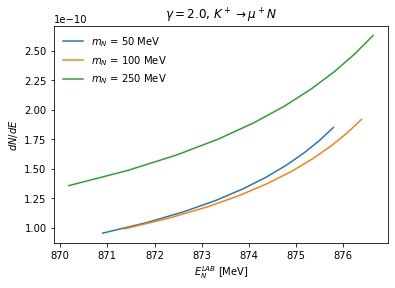

<Figure size 432x288 with 0 Axes>

In [28]:
l = np.linspace(0, 100, 10)
gamma_test = np.linspace(2, 8, 3)
for gamma in gamma_test:
    plt.figure()
    for m_N in [50, 100, 250, 385]:
        print(m_N)
        e_N_LAB, pdf = pdf_E_lab_v(l, m_N, gamma)
        plt.plot(e_N_LAB, pdf, label=f'$m_N$ = {m_N} MeV')
    plt.legend(frameon=False)
    plt.xlabel(r'$E_N^{LAB}$ [MeV]')
    plt.ylabel(r'$dN/dE$')
    plt.title(f'$\gamma = {gamma}$,'+ r' $K^+ \rightarrow \mu^+ N$')
#     plt.yscale('log')
#     plt.savefig(f'plots/AngularCorrelationFlux/e_theta_lab_gamma_{gamma}.png')

ValueError: f(a) and f(b) must have different signs

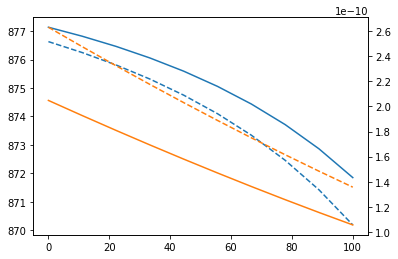

In [13]:
l = np.linspace(0, 100, 10)
gamma_test = np.linspace(2, 8, 3)
for gamma in gamma_test:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for m_N, ls in zip([150, 250, 385], ['-', '--', 'dotted']):
        e_N_LAB, pdf = pdf_E_lab_v(l, m_N, gamma)
        ax1.plot(l, e_N_LAB, 'C0', linestyle=ls, label=f'$m_N$ = {m_N} MeV')
        ax2.plot(l, pdf, 'C1', linestyle=ls, label=f'$m_N$ = {m_N} MeV')
    ax1.legend(frameon=False)
    ax1.set_xlabel(r'l [m]')
    ax1.set_ylabel(r'$E_N^{LAB}$ [MeV]')
    ax2.set_ylabel(r'$dN/dE$')
    ax1.set_title(f'$\gamma = {gamma}$,'+ r' $K^+ \rightarrow \mu^+ N$')
#     plt.yscale('log')
#     plt.savefig(f'plots/AngularCorrelationFlux/e_theta_lab_gamma_{gamma}.png')

In [16]:
theta_lab = 2
m_N = 150
e_N_CM = E_N_CM(m_N)
gamma_parent = 2
theta_0=2*np.pi/180
R0=280

In [17]:
E_labs = np.linspace(0, 3000, 15)
costheta_cm = costheta_cm_from_E_N_lab(E_labs, m_N, gamma_parent)
tan_theta_lab = Tan_Theta_lab(e_N_CM, m_N, gamma_parent, costheta_cm)
sin_theta_lab = tan_theta_lab/np.sqrt(1 + tan_theta_lab**2)

Text(0.5, 0, '$E^{LAB}_N$ [MeV]')

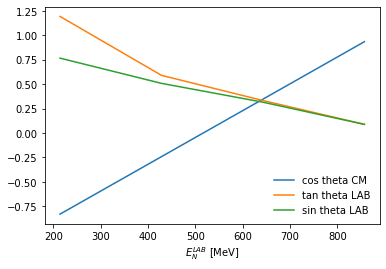

In [18]:
plt.plot(E_labs, costheta_cm, label='cos theta CM')
plt.plot(E_labs, tan_theta_lab, label='tan theta LAB')
plt.plot(E_labs, sin_theta_lab, label='sin theta LAB')
plt.legend(frameon=False)
plt.xlabel(r"$E^{LAB}_N$ [MeV]")
# plt.yscale('log')

Text(0, 0.5, '$\\sin \\theta$')

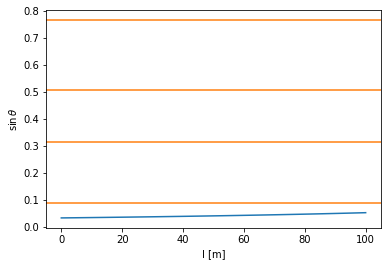

In [19]:
l = np.linspace(0, 100)
sin_theta_l = R0*np.sin(theta_0)/R_given_l(l, theta_0, R0)
plt.plot(l, sin_theta_l)
for stheta in sin_theta_lab:
    plt.axhline(stheta, color='C1')
plt.xlabel('l [m]')
plt.ylabel(r'$\sin \theta$')

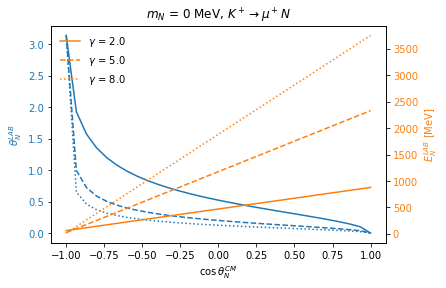

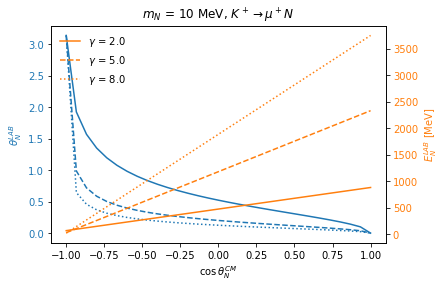

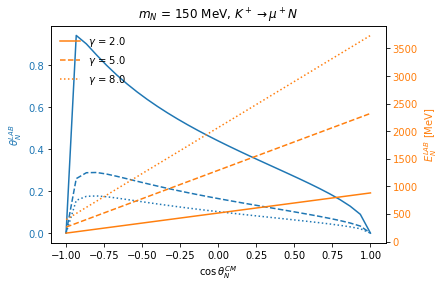

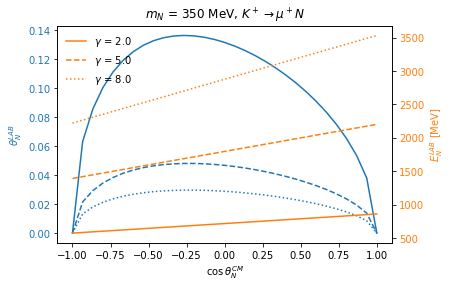

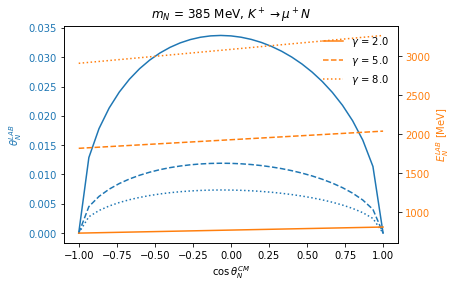

In [20]:
cos_theta_cm_test = np.linspace(-1, 1, 31)
gamma_test = np.linspace(2, 8, 3)
linestyles = ['solid', 'dashed', 'dotted']

for m_N in [0, 10, 150, 350, 385]:
    e_N_CM = E_N_CM(m_N)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for gamma, ls in zip(gamma_test, linestyles):
        this_theta_lab = Theta_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)
        this_E_N_lab = E_N_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)

        ax1.plot(cos_theta_cm_test, this_theta_lab, color='C0', label=f'$\gamma$ = {gamma}',
                 linestyle=ls)    
        ax2.plot(cos_theta_cm_test, this_E_N_lab, color='C1', label=f'$\gamma$ = {gamma}',
                 linestyle=ls)

    plt.legend(frameon=False)
    ax1.set_xlabel(r'$\cos\theta_N^{CM}$')
    plt.title(f'$m_N$ = {m_N} MeV,'+ r' $K^+ \rightarrow \mu^+ N$')
    ax1.set_ylabel(r'$\theta_N^{LAB}$', color='C0')
    ax1.tick_params(axis='y', labelcolor='C0')
    ax2.set_ylabel(r'$E_N^{LAB}$ [MeV]', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')
    plt.savefig(f'plots/AngularCorrelationFlux/m_N_{m_N}.png')

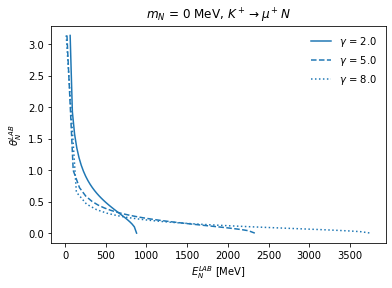

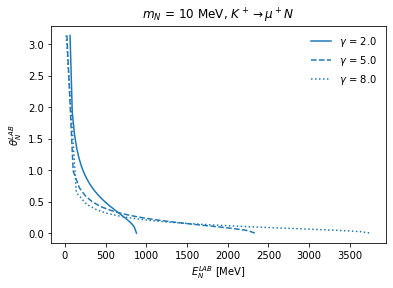

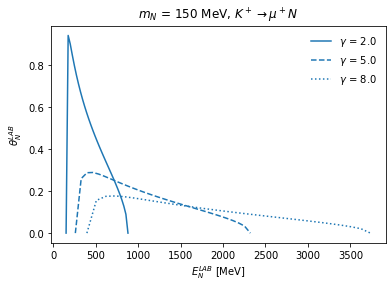

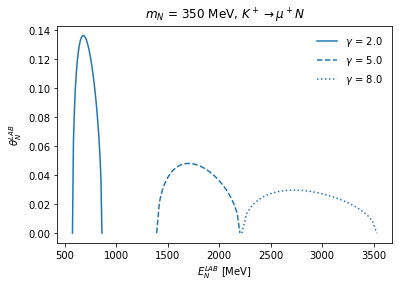

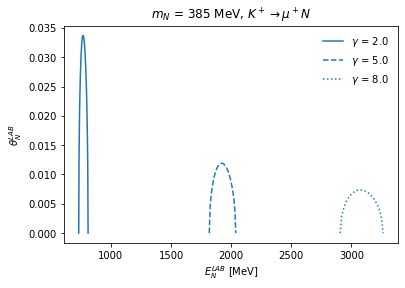

In [21]:
for m_N in [0, 10, 150, 350, 385]:
    e_N_CM = E_N_CM(m_N)
    plt.figure()
    for gamma, ls in zip(gamma_test, linestyles):
        this_theta_lab = Theta_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)
        this_E_N_lab = E_N_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)

        plt.plot(this_E_N_lab, this_theta_lab, color='C0', label=f'$\gamma$ = {gamma}',
                 linestyle=ls)    
    plt.legend(frameon=False)
    plt.xlabel(r'$E_N^{LAB}$ [MeV]')
    plt.ylabel(r'$\theta_N^{LAB}$')
    plt.title(f'$m_N$ = {m_N} MeV,'+ r' $K^+ \rightarrow \mu^+ N$')
    plt.savefig(f'plots/AngularCorrelationFlux/e_theta_lab_m_N_{m_N}.png')

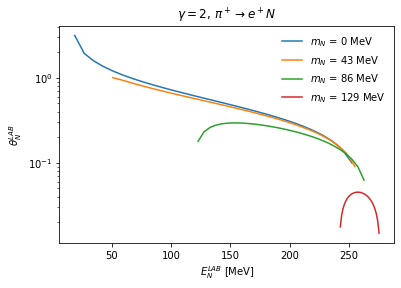

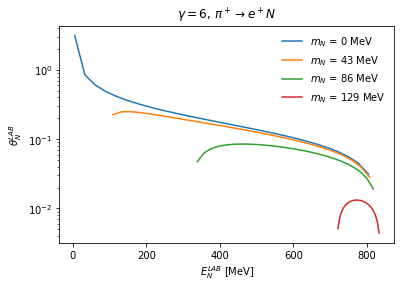

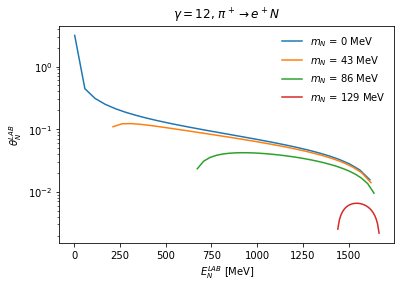

In [25]:
parent = lp.pi_plus
other_daughter = lp.e_plus
cos_theta_cm_test = np.linspace(-1, 1, 31)
gamma_test = [2, 6, 12]
linestyles = ['solid', 'dashed', 'dotted']


for gamma in gamma_test:
    plt.figure()
    for m_N in np.linspace(0, parent.mass-other_daughter.mass-10, 4):
        e_N_CM = E_N_CM(m_N, m_parent=parent.mass, m_other_daughter=other_daughter.mass)
        this_theta_lab = Theta_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)
        this_E_N_lab = E_N_lab(e_N_CM, m_N, gamma, cos_theta_cm_test)
        this_E_N_lab = this_E_N_lab[this_theta_lab!=0]
        this_theta_lab = this_theta_lab[this_theta_lab!=0]
        plt.plot(this_E_N_lab, this_theta_lab, label=f'$m_N$ = {m_N:.3g} MeV')
    plt.legend(frameon=False)
    plt.xlabel(r'$E_N^{LAB}$ [MeV]')
    plt.ylabel(r'$\theta_N^{LAB}$')
    plt.title(f'$\gamma = {gamma}$,'+ r' $\pi^+ \rightarrow e^+ N$')
    plt.yscale('log')
    plt.savefig(f'plots/AngularCorrelationFlux/pion_e_e_theta_lab_gamma_{gamma}.png')